<a href="https://colab.research.google.com/github/Prisha1234L/Prishaprojects/blob/main/PROJECT_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#HOUSE PRICE PREDICTION

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [70]:
from sklearn.datasets import fetch_california_housing
df= fetch_california_housing(as_frame=True)

In [71]:
df.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [72]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [20]:
df.data.dropna(inplace=True)

<ipython-input-20-63caa3c8c8ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.dropna(inplace=True)


In [21]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [61]:
df.data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

<Axes: >

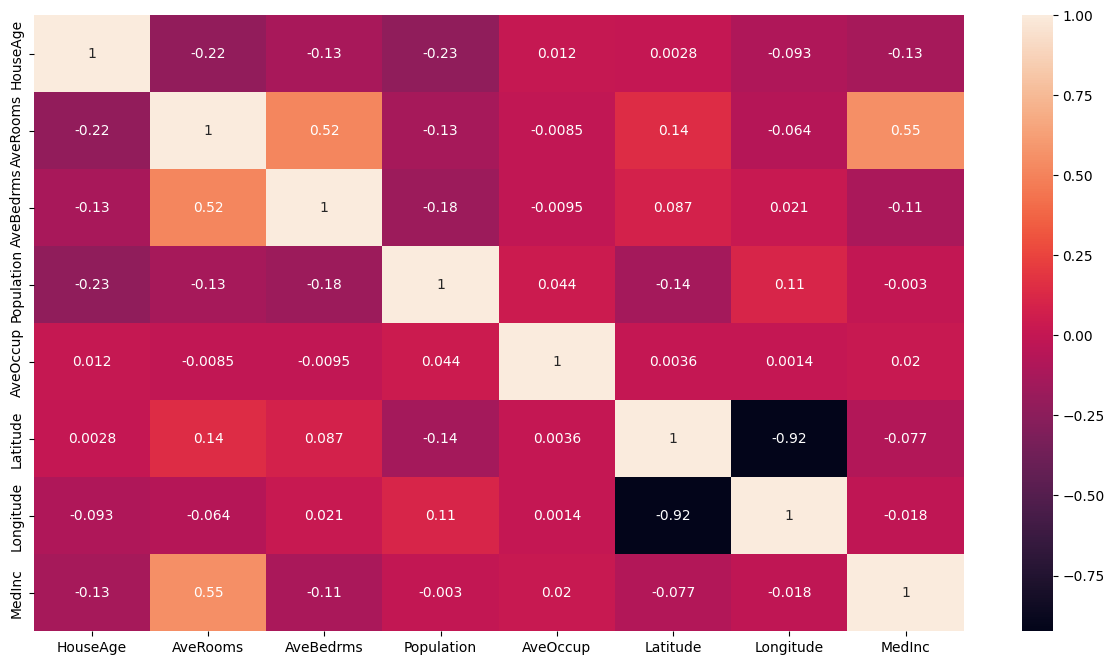

In [81]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

In [57]:
x=df.data.drop(['MedInc'],axis=1)
y=df.data['MedInc']
cols=x.columns

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [80]:
y_test

8900     8.9616
7767     2.6397
15175    6.8099
8902     3.9659
8478     5.0653
          ...  
1760     3.1571
4737     4.4191
12259    1.8845
5620     1.4444
1632     6.9170
Name: MedInc, Length: 6192, dtype: float64

In [52]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2_score(y_test,pred)

0.5597898347580936

In [58]:
cdf=pd.DataFrame(lr.coef_,cols,['coefficients']).sort_values('coefficients',ascending=False)
cdf

,coefficients
AveRooms,1.069965
AveOccup,0.003780
Population,-0.000015
HouseAge,-0.009193
Longitude,-0.656889
Latitude,-0.704271
AveBedrms,-4.850455


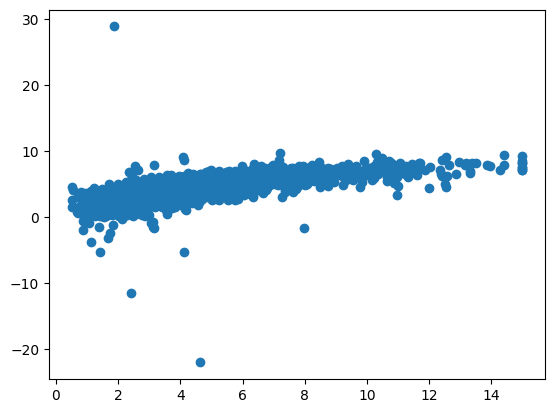

In [82]:
p=lr.predict(x_test)
plt.scatter(y_test,p)

<ipython-input-83-0c3728241156>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred),bins=50)


<Axes: xlabel='MedInc', ylabel='Density'>

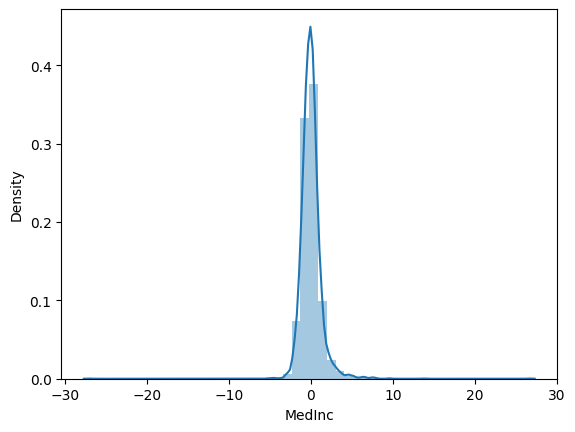

In [83]:
sns.distplot((y_test-pred),bins=50)